In [1]:
# importing necessary libraries and configurations
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

plt.style.use("seaborn-dark")
%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_05.csv")

In [3]:
# data cleaning and indexing 
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

incident_number highest_offense_description  \
occurred_date_time                                                 
2003-01-01 00:01:00    2003924613085         BURGLARY OF VEHICLE   
2003-01-01 01:25:00    2003920010463         PUBLIC INTOXICATION   
2003-01-01 02:08:00    2003920010613                         DWI   
2003-01-01 02:44:00    2003920010783                         DWI   
2003-01-01 02:45:00    2003920010806                         DWI   

                        report_date_time                 location_type  \
occurred_date_time                                                       
2003-01-01 00:01:00  2003-01-02 14:54:00         PARKING LOTS / GARAGE   
2003-01-01 01:25:00  2003-01-01 01:25:00         PARKING LOTS / GARAGE   
2003-01-01 02:08:00  2003-01-01 02:08:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01 02:44:00  2003-01-01 03:07:00  STREETS / HWY / ROAD / ALLEY   
2003-01-01 02:45:00  2003-01-01 03:15:00  STREETS / HWY / ROAD / ALLEY   

                                     address  council_district apd_sector  \
occurred_date_time                                                          
2003-01-01 00:01:00             2900 COLE ST               9.0         BA   
2003-01-01 01:25:00        2021 GUADALUPE ST               9.0         BA   
2003-01-01 02:08:00          3500 N IH 35 SB               9.0         BA   
2003-01-01 02:44:00  2000 BLOCK GUADALUPE ST               9.0         BA   
2003-01-01 02:45:00      1900 BLOCK PEARL ST               9.0         BA   

                    apd_district   latitude  longitude  year  month  week  \
occurred_date_time                                                          
2003-01-01 00:01:00            1  30.287795 -97.725294  2003      1     1   
2003-01-01 01:25:00            1  30.283460 -97.741275  2003      1     1   
2003-01-01 02:08:00            1  30.292694 -97.721123  2003      1     1   
2003-01-01 02:44:00            1  30.282842 -97.742397  2003      1     1   
2003-01-01 02:45:00            2  30.283417 -97.747028  2003      1     1   

                     day  hour  
occurred_date_time              
2003-01-01 00:01:00    1     0  
2003-01-01 01:25:00    1     1  
2003-01-01 02:08:00    1     2  
2003-01-01 02:44:00    1     2  
2003-01-01 02:45:00    1     2

incident_number    highest_offense_description  \
occurred_date_time                                                    
2020-11-25 23:00:00      20205048242  BURGLARY OF VEH-NO SUSPECT/FU   
2020-11-26 16:41:00      20203310774            ASSAULT WITH INJURY   
2020-11-27 11:07:00      20205048364                     MAIL THEFT   
2020-11-27 12:41:00      20205048355         BURGLARY NON RESIDENCE   
2020-11-28 17:03:00      20205048507          BURGLARY OF RESIDENCE   

                        report_date_time                       location_type  \
occurred_date_time                                                             
2020-11-25 23:00:00  2020-11-26 11:11:00                    RESIDENCE / HOME   
2020-11-26 16:41:00  2020-11-26 17:25:00  DRUG STORE / DR. OFFICE / HOSPITAL   
2020-11-27 11:07:00  2020-11-27 13:53:00                    RESIDENCE / HOME   
2020-11-27 12:41:00  2020-11-27 12:41:00                     OTHER / UNKNOWN   
2020-11-28 17:03:00  2020-11-28 17:41:00                    RESIDENCE / HOME   

                                 address  council_district apd_sector  \
occurred_date_time                                                      
2020-11-25 23:00:00        900 W 26TH ST               9.0         BA   
2020-11-26 16:41:00        919 E 32ND ST               9.0         BA   
2020-11-27 11:07:00        803 W 28TH ST               9.0         BA   
2020-11-27 12:41:00       2200 NUECES ST               9.0         BA   
2020-11-28 17:03:00  2515 SAN GABRIEL ST               9.0         BA   

                    apd_district   latitude  longitude  year  month  week  \
occurred_date_time                                                          
2020-11-25 23:00:00            3  30.290995 -97.746501  2020     11    48   
2020-11-26 16:41:00            1  30.290674 -97.726743  2020     11    48   
2020-11-27 11:07:00            3  30.293159 -97.745553  2020     11    48   
2020-11-27 12:41:00            1  30.285414 -97.744166  2020     11    48   
2020-11-28 17:03:00            3  30.290693 -97.747254  2020     11    48   

                     day  hour  
occurred_date_time              
2020-11-25 23:00:00   25    23  
2020-11-26 16:41:00   26    16  
2020-11-27 11:07:00   27    11  
2020-11-27 12:41:00   27    12  
2020-11-28 17:03:00   28    17

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_mur = df[df.highest_offense_description == "MURDER"]
df_mur_cap = df[df.highest_offense_description == "CAPITAL MURDER"]
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]
df_rape = df[df.highest_offense_description == "RAPE"]


# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders (2017-present)
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

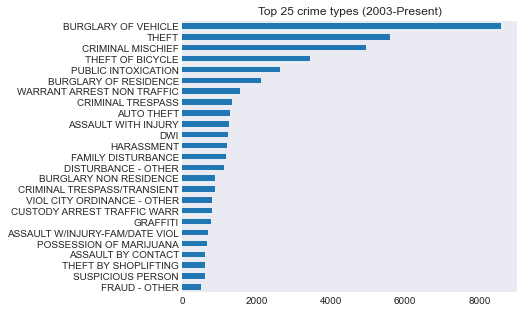

----------------------------------------------------------
----------------------------------------------------------


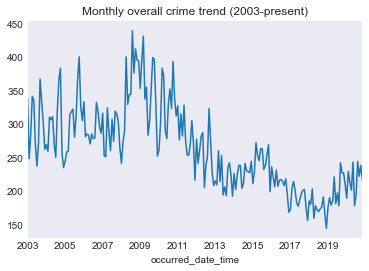

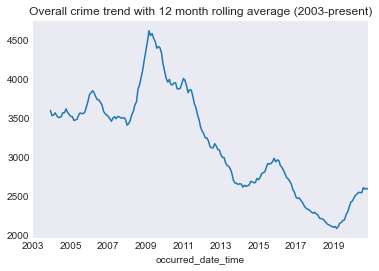

----------------------------------------------------------
----------------------------------------------------------


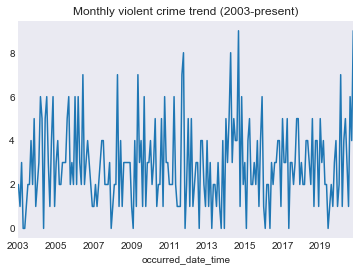

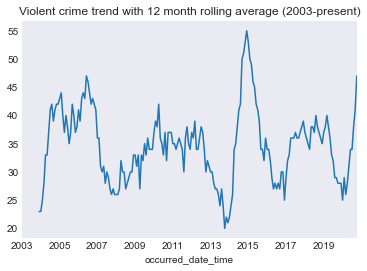

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 5), title="Top 25 crime types (2003-Present)"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

df.resample("M").size().plot(
    title="Monthly overall crime trend (2003-present)", figsize=(6, 4)
)
plt.show()

# Violent crime trend with a year rolling average
df.resample("M").size().rolling(12).sum().plot(
    title="Overall crime trend with 12 month rolling average (2003-present)",
    figsize=(6, 4),
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

# Plotting violent crime trend on a monthly basis
df_viol.resample("M").size().plot(
    title="Monthly violent crime trend (2003-present)", figsize=(6, 4)
)
plt.show()

# Violent crime trend with a year rolling average
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend with 12 month rolling average (2003-present)",
    figsize=(6, 4),
)
plt.show()

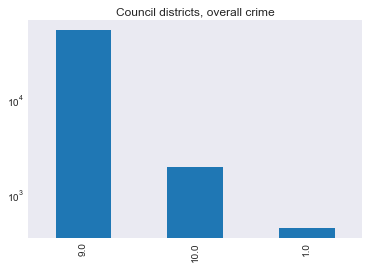

----------------------------------------------------------


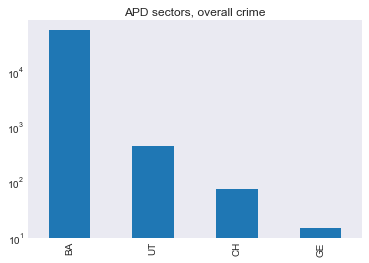

----------------------------------------------------------


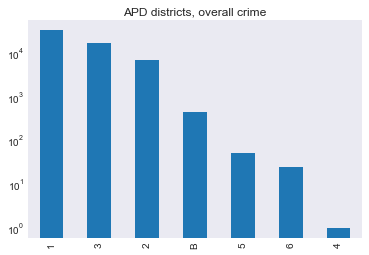

In [6]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(
    title="Council districts, overall crime", logy=True
)
plt.show()

print("----------------------------------------------------------")

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime", logy=True)
plt.show()

print("----------------------------------------------------------")

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime", logy=True)
plt.show()

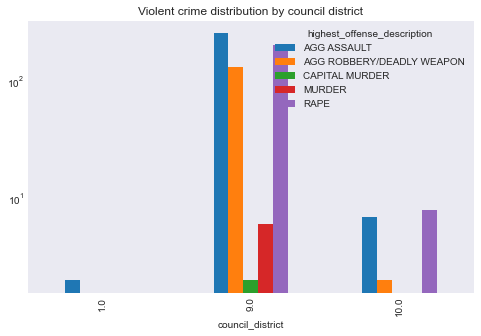

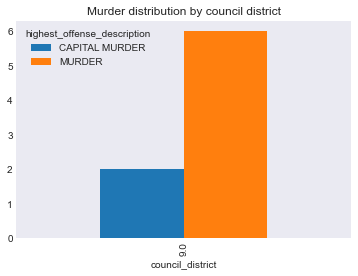

----------------------------------------------------------
----------------------------------------------------------


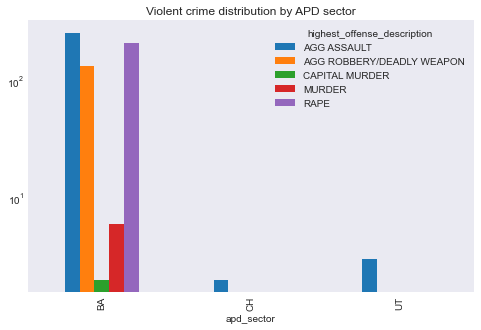

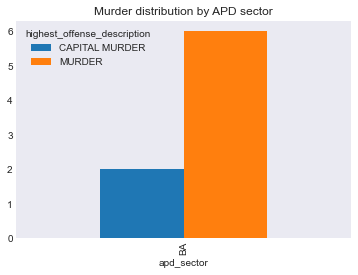

----------------------------------------------------------
----------------------------------------------------------


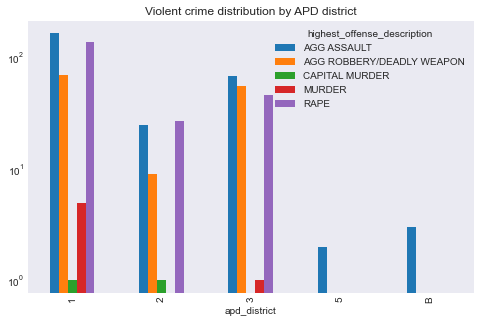

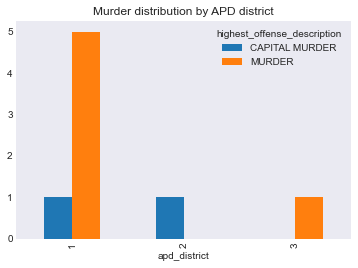

In [7]:
# Showing violent crime and murder rates by council districts, APD districts, and sectors
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(8, 5), logy=True, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(title="Murder distribution by council district")
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(8, 5), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD sector"
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(8, 5), logy=True, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                             1   
BANKS / SAVINGS & LOAN                                    0   
BAR / NIGHT CLUB                                          6   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                      3   
COMMERCIAL / OFFICE BUILDING                              4   
CONSTRUCTION SITE                                         3   
CONVENIENCE STORE                                         4   
DEPARTMENT / DISCOUNT STORE                               1   
DRUG STORE / DR. OFFICE / HOSPITAL                        9   
FIELD / WOODS                                             2   
GAS / SERVICE STATIONS                                    2   
GOVERNMENT / PUBLIC BUILDING                              1   
HOTEL / MOTEL / ETC.                                      1   
LAKE / WATERWAY                                           0   
LIQUOR STORE                                              1   
OTHER / UNKNOWN                                          12   
PARK / PLAYGROUND                                         2   
PARKING LOTS / GARAGE                                    19   
RESIDENCE / HOME                                         65   
RESTAURANTS                                               7   
SCHOOL - COLLEGE / UNIVERSITY                             0   
SPECIALTY  STORE (TV  FUR ETC.)                           1   
STREETS / HWY / ROAD / ALLEY                            120   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)            2   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ABANDONED/CONDEMNED STRUCTURE                                           0   
BANKS / SAVINGS & LOAN                                                  5   
BAR / NIGHT CLUB                                                        0   
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE                                    0   
COMMERCIAL / OFFICE BUILDING                                            6   
CONSTRUCTION SITE                                                       0   
CONVENIENCE STORE                                                       0   
DEPARTMENT / DISCOUNT STORE                                             1   
DRUG STORE / DR. OFFICE / HOSPITAL                                      4   
FIELD / WOODS                                                           0   
GAS / SERVICE STATIONS                                                  1   
GOVERNMENT / PUBLIC BUILDING                                            0   
HOTEL / MOTEL / ETC.                                                    1   
LAKE / WATERWAY                                                         0   
LIQUOR STORE                                                            0   
OTHER / UNKNOWN                                                         3   
PARK / PLAYGROUND                                                       0   
PARKING LOTS / GARAGE                                                  24   
RESIDENCE / HOME                                                       28   
RESTAURANTS                                                             3   
SCHOOL - COLLEGE / UNIVERSITY                                           0   
SPECIALTY  STORE (TV  FUR ETC.)                                         0   
STREETS / HWY / ROAD / ALLEY                                           59   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)                          0   

highest_offense_description                     CAPITAL MURDER  MURDER  RAPE  
location_type                                                                 
ABANDONED/CONDEMNED STRUCTURE                                0       0     0  
BANKS / SAVINGS & LOAN                                       0       0     0  
BAR / NIGHT CLUB                          

----------------------------------------------------------
----------------------------------------------------------


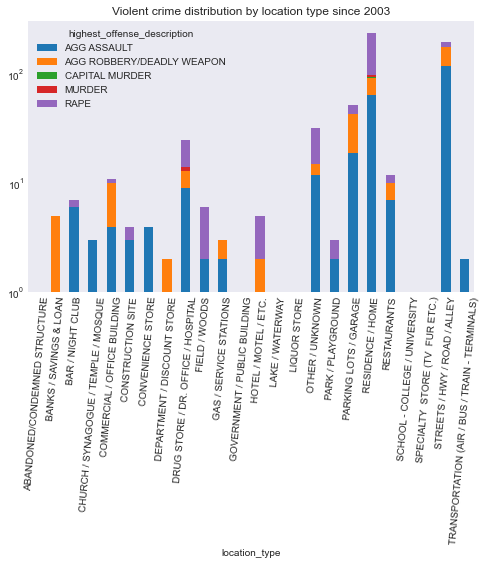

----------------------------------------------------------
----------------------------------------------------------


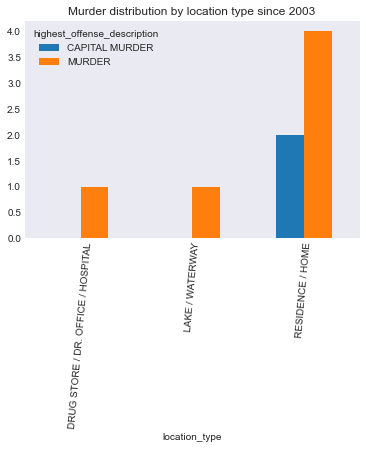

In [14]:
# Showing violent crime and murder rates by location type
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.bar(
    stacked=True,
    figsize=(8, 5),
    logy=True,
    rot=85,
    title="Violent crime distribution by location type since 2003",
)
plt.show()

print("----------------------------------------------------------")
print("----------------------------------------------------------")

mur_loc.plot.bar(rot=85, title="Murder distribution by location type since 2003")
plt.show()

In [12]:
# Show addresses with 5 or more reported violent crimes
display(df_viol.address.value_counts().head(8))

# Show addresses where murders occurred 
display(df_viol_mur.address.value_counts())

900 BLOCK E 32ND ST          54
919 E 32ND ST                36
2510 LEON ST                  8
600 BLOCK W 26TH ST           7
600 W 26TH ST                 7
1200 BLOCK W 38TH ST          6
2400 BLOCK SAN GABRIEL ST     6
500 BLOCK W 22ND ST           5
Name: address, dtype: int64

2812 NUECES ST         1
2529 RIO GRANDE ST     1
W 30TH ST / EAST DR    1
904 W 21ST ST          1
900 E 30TH ST          1
3303 LIBERTY ST        1
3102 1/2 KING ST       1
510 W 26TH ST          1
Name: address, dtype: int64

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


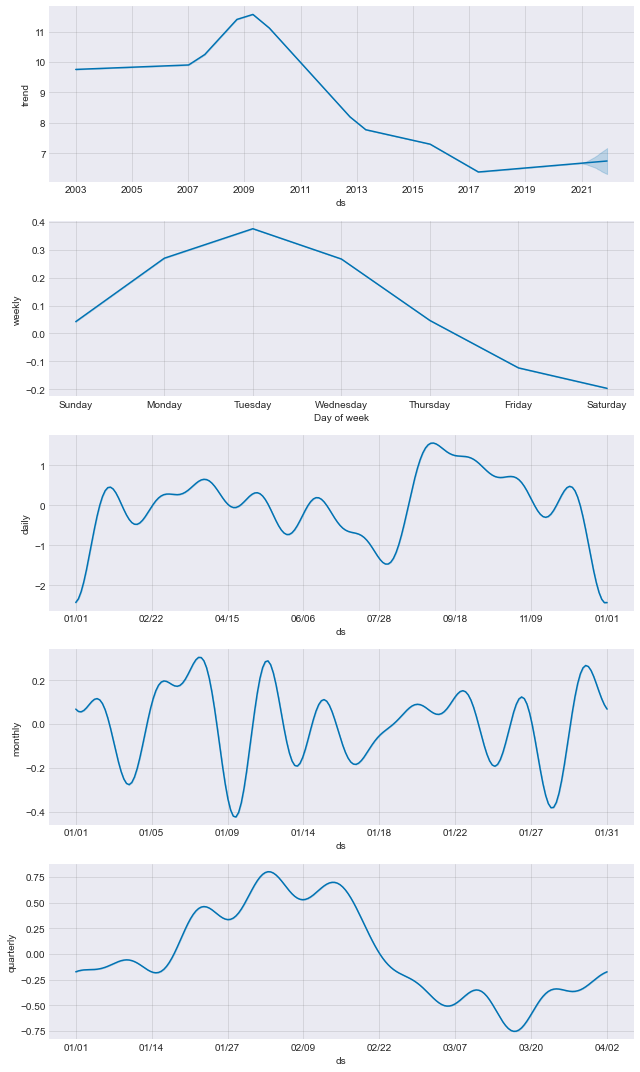

In [13]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1